# We will create horizontal bar race chart for COVID19 cases state wise
we are going to use covid19india api(https://api.covid19india.org/v4/timeseries.json) for data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import requests


##create your dataFrame

In [3]:
df = pd.read_json('https://api.covid19india.org/v4/timeseries.json')
df.head(2)

AN  \
dates  {'2020-03-26': {'delta': {'confirmed': 1}, 'to...   

                                                      AP  \
dates  {'2020-03-12': {'delta': {'confirmed': 1}, 'to...   

                                                      AR  \
dates  {'2020-04-02': {'delta': {'confirmed': 1}, 'to...   

                                                      AS  \
dates  {'2020-03-31': {'delta': {'confirmed': 1}, 'to...   

                                                      BR  \
dates  {'2020-03-22': {'delta': {'confirmed': 2}, 'to...   

                                                      CH  \
dates  {'2020-03-19': {'delta': {'confirmed': 1}, 'to...   

                                                      CT  \
dates  {'2020-03-19': {'delta': {'confirmed': 1}, 'to...   

                                                      DL  \
dates  {'2020-03-02': {'delta': {'confirmed': 1}, 'to...   

                                                      DN  \
dates  {'2020-04-09': {'delta': {'tested': 80}, 'tota...   

                                                      GA  ...  \
dates  {'2020-03-25': {'delta': {'confirmed': 3}, 'to...  ...   

                                                      RJ  \
dates  {'2020-03-03': {'delta': {'confirmed': 1}, 'to...   

                                                      SK  \
dates  {'2020-05-04': {'delta': {'tested': 170}, 'tot...   

                                                      TG  \
dates  {'2020-03-02': {'delta': {'confirmed': 1}, 'to...   

                                                      TN  \
dates  {'2020-03-07': {'delta': {'confirmed': 1}, 'to...   

                                                      TR  \
dates  {'2020-04-06': {'delta': {'confirmed': 1}, 'to...   

                                                      TT  \
dates  {'2020-01-30': {'delta': {'confirmed': 1}, 'to...   

                                                      UN  \
dates  {'2020-05-19': {'delta': {'confirmed': 814}, '...   

                                                      UP  \
dates  {'2020-03-04': {'delta': {'confirmed': 7}, 'to...   

                                                      UT  \
dates  {'2020-03-15': {'delta': {'confirmed': 1}, 'to...   

                                                      WB  
dates  {'2020-03-17': {'delta': {'confirmed': 1}, 'to...  

[1 rows x 37 columns]

In [4]:
# Convert data to date wise
states = df.columns
dates = tuple(df['BR']['dates'])
current_date = max(dates)

# latest update
df['MH']['dates'][current_date]['total']

{'confirmed': 548313,
 'deceased': 18650,
 'other': 307,
 'recovered': 381843,
 'tested': 2913686}

In [5]:
# Lets just select 'confirmed' cases we can change that any time
data_selected = 'confirmed'
# datasets = ('tested', 'confirmed', 'deceased', 'recovered')
list_of_cases = []
def obtain_data_for_a_date(date):
    list_of_cases = []
    for i in df.columns:
        try:
            # replace confirmed with the data you want to get
            list_of_cases.append(df[i]['dates'][date]['total'][data_selected])
        except:
            # in case no data is available append 0
            list_of_cases.append(0)
    return list_of_cases
data_dict = {date : obtain_data_for_a_date(date) for date in dates}
sorted_dict = sorted(data_dict.items(), key=lambda item: item[1], reverse=True)

In [6]:
# Obtain new dataframe
dff = pd.DataFrame.from_dict(data_dict, orient='index', columns=states)
del dff['TT']
dff.tail(2)

AN      AP    AR     AS     BR    CH     CT      DL    DN    GA  \
2020-08-12  1900  254146  2430  69000  90553  1751  13552  148504  1695  9924   
2020-08-13  1900  254146  2430  69000  90553  1751  13552  148504  1695  9924   

            ...    PY     RJ   SK     TG      TN    TR  UN      UP     UT  \
2020-08-12  ...  6381  56100  930  84544  314520  6497   0  136238  10886   
2020-08-13  ...  6381  56708  930  86475  314520  6497   0  136238  10886   

                WB  
2020-08-12  104326  
2020-08-13  104326  

[2 rows x 36 columns]

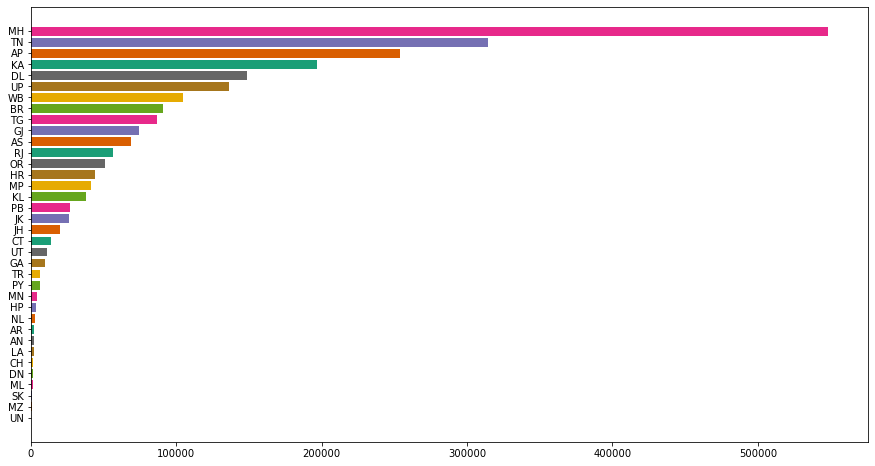

In [7]:
# Simple bar chart for a particular date
fig, ax = plt.subplots(figsize=(15,8))
dff = dff.sort_values(by=current_date, axis = 1, ascending=True)
# select a row from dataframe
s = dff.loc[current_date]
ax.clear()
colors = plt.cm.Dark2(range(8))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors)
plt.show()


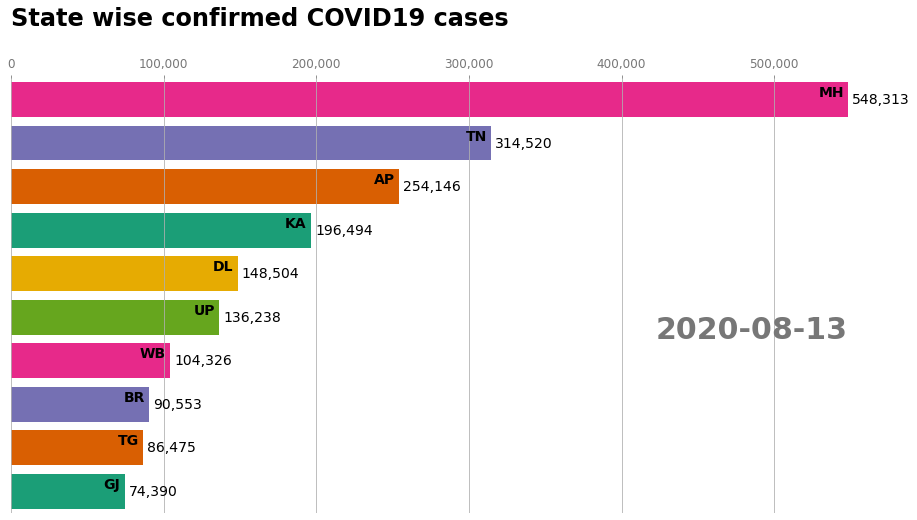

In [8]:
# draw_barchart function with polished chart
fig, ax = plt.subplots(figsize=(15,8))
def draw_barchart(date):
    global dff
    # sort the data frame by row values
    dff = dff.sort_values(by=date, axis = 1, ascending=True)
    # select a row from dataframe
    s = dff.loc[date][-10:]     # using showing only top 10 sates at a time 
    ax.clear()
    colors = plt.cm.Dark2(range(6))

    
    # use dataframe index to plot on y axis
    y = s.index
    width = s.values
    ax.barh(y=y, width=width, color=colors)
    
    """ Improving look and feel """
    # show the date on right bottom vacant space which will change with date
    ax.text(1, 0.4, date, color='#777777', transform=ax.transAxes, size=30, weight=800, ha='right')
    # use xticks on top
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    # Remove y ticks
    ax.set_yticks([])
    # show grid for x axis
    ax.grid(which='major', axis='x', linestyle='-')
    # set initial and ending margin of the plot on canvas
    ax.margins(0, 0.01)
    # spacing between index and value on the bar top ticks
    dx = max(s.values)/200 
    # iterate over the values to plot labels and values (States, cases)
    for i, (name, value) in enumerate(zip(s.index, s.values)):
        ax.text(value - dx, i,     name,     size=14,  weight=800,         ha='right', va='bottom')  # Maharastra: name
        ax.text(value + dx, i,     f'{value:,.0f}',    size=14,          ha='left', va='center')   # 500000: value
    # set title
    ax.text(0, 1.12, 'State wise confirmed COVID19 cases',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
draw_barchart(current_date)

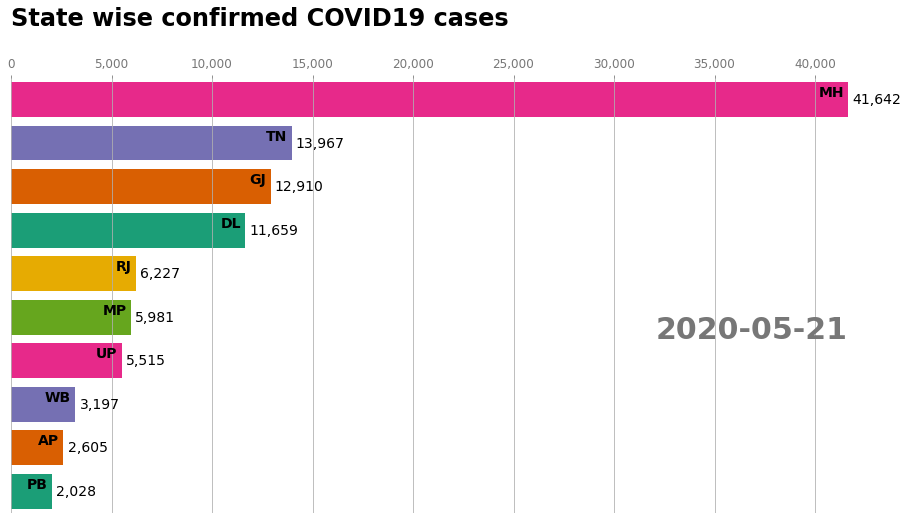

In [9]:
# Animate Race
fig, ax = plt.subplots(figsize=(15,8))
animator = animation.FuncAnimation(fig, func=draw_barchart, frames=dates[60:])
HTML(animator.to_jshtml())